<a href="https://colab.research.google.com/github/maulanasalky/TugasKelompok/blob/main/UAS_BDDM7_22_11_5321_A_Salky_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mental_dis = pd.read_csv('/content/Dataset-Mental-Disorders.csv')
mental_dis.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


# 1.	DATA PREPROCESSING

In [3]:
mental_dis = mental_dis.drop('Patient Number', axis=1)

In [4]:
mental_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

In [5]:
for column in mental_dis.columns:
    unique_count = mental_dis[column].nunique()
    unique_values = mental_dis[column].unique()

    print(f"The number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}:")
    for value in unique_values:
          print(value)
    print('\n')

The number of unique values in Sadness: 4
Unique values in Sadness:
Usually
Sometimes
Seldom
Most-Often


The number of unique values in Euphoric: 4
Unique values in Euphoric:
Seldom
Most-Often
Usually
Sometimes


The number of unique values in Exhausted: 4
Unique values in Exhausted:
Sometimes
Usually
Seldom
Most-Often


The number of unique values in Sleep dissorder: 4
Unique values in Sleep dissorder:
Sometimes
Most-Often
Usually
Seldom


The number of unique values in Mood Swing: 2
Unique values in Mood Swing:
YES
NO


The number of unique values in Suicidal thoughts: 3
Unique values in Suicidal thoughts:
YES 
YES
NO


The number of unique values in Anorxia: 2
Unique values in Anorxia:
NO
YES


The number of unique values in Authority Respect: 2
Unique values in Authority Respect:
NO
YES


The number of unique values in Try-Explanation: 2
Unique values in Try-Explanation:
YES
NO


The number of unique values in Aggressive Response: 2
Unique values in Aggressive Response:
NO
YES


T

In [6]:
missing_data = mental_dis.isnull().sum()
missing_data

,0
Sadness,0
Euphoric,0
Exhausted,0
Sleep dissorder,0
Mood Swing,0
Suicidal thoughts,0
Anorxia,0
Authority Respect,0
Try-Explanation,0
Aggressive Response,0


In [7]:
mental_dis = mental_dis.rename(columns={'Optimisim': 'Optimism'})
mental_dis = mental_dis.rename(columns={'Anorxia': 'Anorexia'})
mental_dis['Suicidal thoughts'] = mental_dis['Suicidal thoughts'].replace('YES ', "YES")

In [8]:
mapping_dict = {'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}
mental_dis['Expert Diagnose'] = mental_dis['Expert Diagnose'].map(mapping_dict).astype(int)
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [9]:
yes_and_no_columns = ['Mood Swing', 'Suicidal thoughts', 'Anorexia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']

for column in yes_and_no_columns:
    mental_dis[column] = mental_dis[column].map({'YES': 1, 'NO': 0}).astype(int)

mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [10]:
from_columns = ['Sexual Activity', 'Concentration', 'Optimism']
for column in from_columns:
    mental_dis[column] = mental_dis[column].astype(str).str.extract('(\d)')
    mental_dis[column] = pd.to_numeric(mental_dis[column])

mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [11]:
frequency_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for column in frequency_columns:
    mental_dis[column] = mental_dis[column].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)

mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


# 2. EDA

In [12]:
mental_dis.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


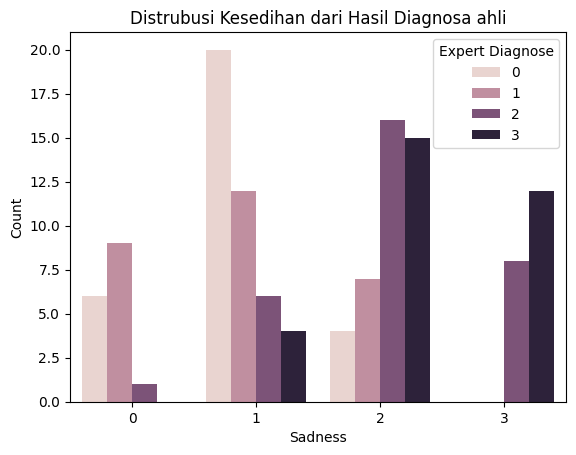

In [21]:
sns.countplot(x = 'Sadness', hue = 'Expert Diagnose', data = mental_dis)
plt.title('Distrubusi Kesedihan dari Hasil Diagnosa ahli')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.show()

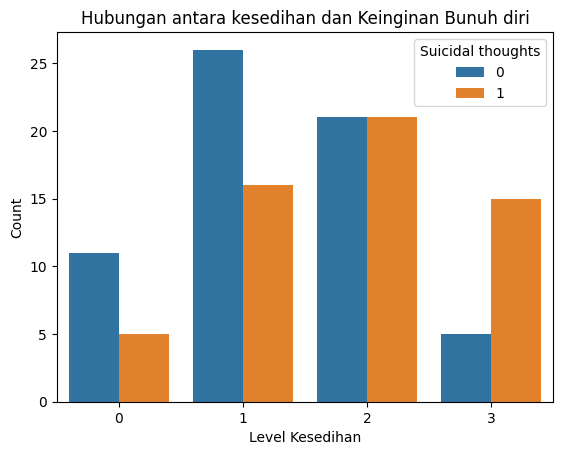

In [22]:
sns.countplot(x='Sadness', hue='Suicidal thoughts', data=mental_dis)
plt.title('Hubungan antara kesedihan dan Keinginan Bunuh diri')
plt.xlabel('Level Kesedihan')
plt.ylabel('Count')
plt.show()

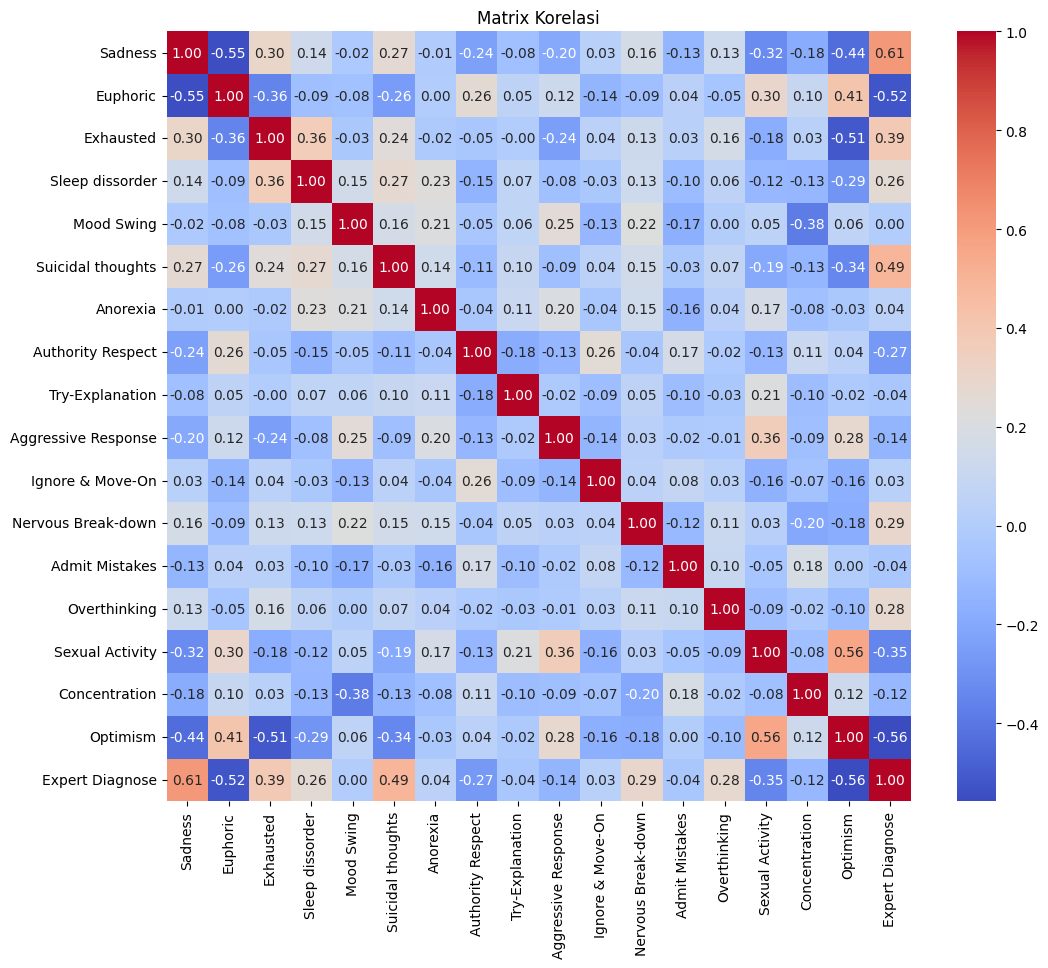

In [23]:
correlation_matrix = mental_dis.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi')
plt.show()

In [26]:
correlation_matrix = mental_dis.corr()
print(correlation_matrix['Expert Diagnose'].sort_values(ascending=False))

Expert Diagnose        1.000000
Sadness                0.614234
Suicidal thoughts      0.490533
Exhausted              0.387082
Nervous Break-down     0.288261
Overthinking           0.280559
Sleep dissorder        0.259539
Anorexia               0.043414
Ignore & Move-On       0.026289
Mood Swing             0.001112
Try-Explanation       -0.043380
Admit Mistakes        -0.044073
Concentration         -0.123090
Aggressive Response   -0.140055
Authority Respect     -0.268179
Sexual Activity       -0.350414
Euphoric              -0.521914
Optimism              -0.557990
Name: Expert Diagnose, dtype: float64


# 4. Model

In [15]:
X = mental_dis.iloc[:, :-1]
y = mental_dis['Expert Diagnose']

In [25]:
import pandas as pd

rf_classifier_best = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=2, random_state=0
)
rf_classifier_best.fit(X_train, y_train)

feature_importances = rf_classifier_best.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
4            Mood Swing    0.296424
16             Optimism    0.147219
14      Sexual Activity    0.123543
0               Sadness    0.086166
1              Euphoric    0.049183
5     Suicidal thoughts    0.049008
15        Concentration    0.036051
2             Exhausted    0.032351
3       Sleep dissorder    0.030429
9   Aggressive Response    0.028930
7     Authority Respect    0.026053
13         Overthinking    0.023366
11   Nervous Break-down    0.019607
6              Anorexia    0.017761
10     Ignore & Move-On    0.012959
12       Admit Mistakes    0.011675
8       Try-Explanation    0.009275


In [27]:
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)
rfe_selector.fit(X_train, y_train)

selected_features = X.columns[rfe_selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Sadness', 'Mood Swing', 'Sexual Activity', 'Concentration',
       'Optimism'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state = 0)


grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, verbose = 0)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Random Forest

In [17]:
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state = 0)
optimized_rf_classifier.fit(X_train, y_train)

y_pred_test = optimized_rf_classifier.predict(X_test)
y_pred_train = optimized_rf_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

rf_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {rf_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 100.00%
Testing Accuracy: 95.83%
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      0.50      0.67         2

    accuracy                           0.96        24
   macro avg       0.97      0.88      0.90        24
weighted avg       0.96      0.96      0.95        24



SVM

In [18]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

svm_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {svm_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 84.38%
Testing Accuracy: 62.50%
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.50      1.00      0.67         5
           2       1.00      0.38      0.55         8
           3       0.25      0.50      0.33         2

    accuracy                           0.62        24
   macro avg       0.65      0.64      0.57        24
weighted avg       0.78      0.62      0.63        24



Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

models = [optimized_rf_classifier,  svm]

cv_scores = {}

for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[model_name] = np.mean(scores)

for model_name, score in cv_scores.items():
    print(f"{model_name}: {score:.4f}")

RandomForestClassifier: 0.9000
SVC: 0.7000
